In [78]:
import pandas as pd
import numpy as np

# VERİ SETİ YÜKLEME

In [59]:
veri_seti1 = pd.read_csv('../datasets/train.csv')
ozellikler1 = pd.read_csv('../datasets/feature_info_gain_df.csv')

C:\Users\Osman\AppData\Local\Temp\ipykernel_8256\222158246.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  veri_seti1 = pd.read_csv('datasets/train.csv')


In [79]:
veri_seti=veri_seti1.copy()
ozellikler = ozellikler1.copy()

# VERİ ANALİZ

In [80]:
veri_seti.shape

(852719, 97)

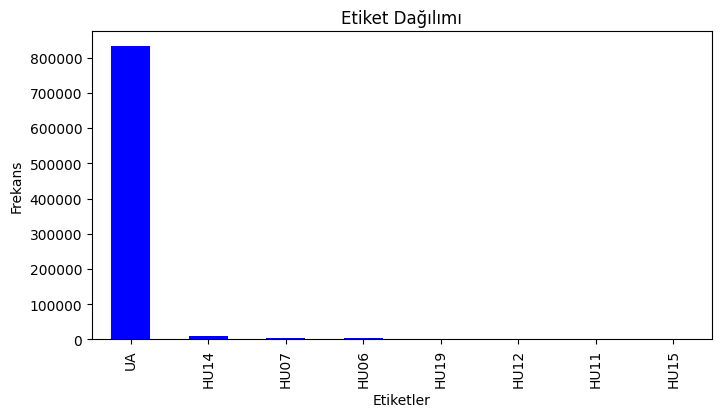

Toplam Etiket sayısı: 8


In [81]:
import matplotlib.pyplot as plt

etiket_dagilimi = veri_seti['LABEL'].value_counts()

plt.figure(figsize=(8, 4))
etiket_dagilimi.plot(kind='bar', color='blue')
plt.title('Etiket Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Frekans')
plt.show()
print("Toplam Etiket sayısı:", len(etiket_dagilimi))


In [82]:
print(veri_seti['LABEL'].value_counts())

LABEL
UA      832770
HU14     10754
HU07      3728
HU06      3178
HU19       759
HU12       676
HU11       439
HU15       415
Name: count, dtype: int64


In [83]:
print("Gerçek veri seti kolonlar: ",veri_seti.columns)
print("Boş değer sayısı: ",veri_seti.isnull().sum().sum())

Gerçek veri seti kolonlar:  Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET'

## Eksik veri analiz

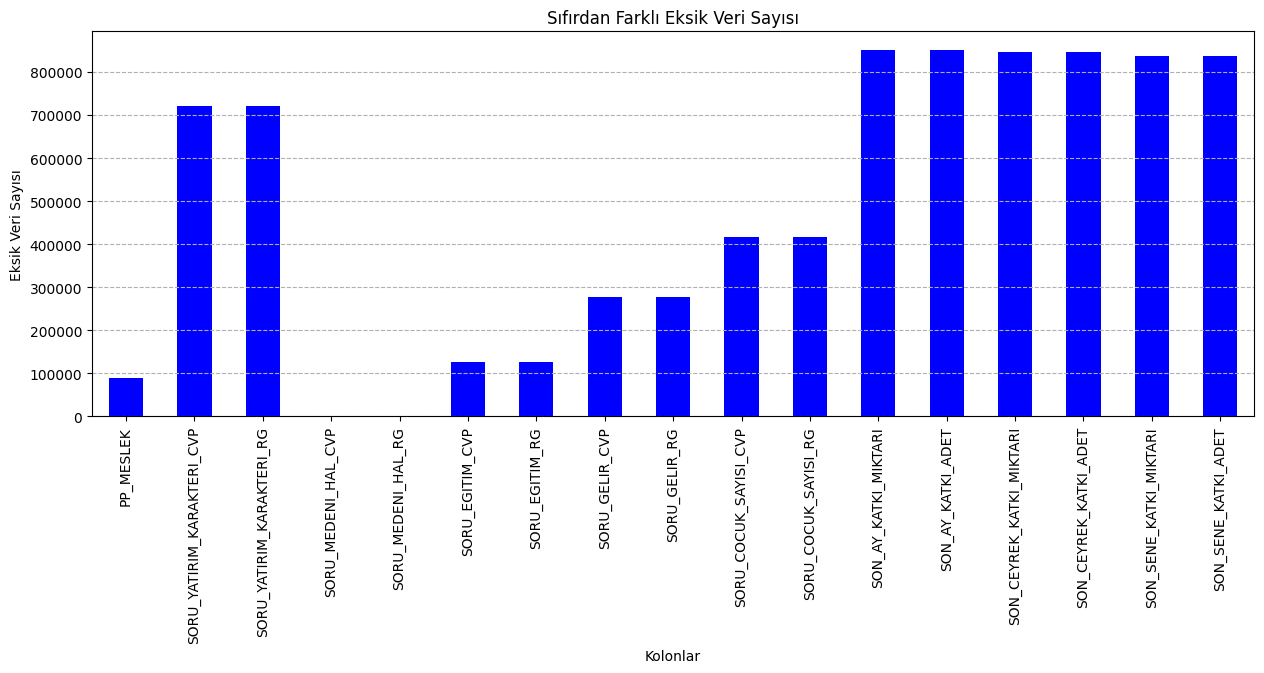

In [84]:
eksik_veri_sayisi = veri_seti.isnull().sum()

eksik_veri_sayisi_sifir_degil = eksik_veri_sayisi[eksik_veri_sayisi != 0]

plt.figure(figsize=(15,5))
eksik_veri_sayisi_sifir_degil.plot(kind='bar', color='blue')
plt.title('Sıfırdan Farklı Eksik Veri Sayısı')
plt.xlabel('Kolonlar')
plt.ylabel('Eksik Veri Sayısı')
plt.grid(axis='y', linestyle='--')
plt.show()

In [85]:
eksik_sutunlar = [
    'PP_MESLEK', 'SORU_YATIRIM_KARAKTERI_CVP', 'SORU_YATIRIM_KARAKTERI_RG',
    'SORU_MEDENI_HAL_CVP', 'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
    'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP', 'SORU_COCUK_SAYISI_RG',
    'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI',
    'SON_CEYREK_KATKI_ADET', 'SON_SENE_KATKI_MIKTARI', 'SON_SENE_KATKI_ADET'
]

for sutun in eksik_sutunlar:
    if sutun not in veri_seti.columns:
        print(f"Hata: '{sutun}' sütunu veri setinde bulunmamaktadır.")
    else:
        print(f"Kolon: {sutun} Tip: {type(veri_seti[sutun].dtype)}")


Kolon: PP_MESLEK Tip: <class 'numpy.dtypes.ObjectDType'>
Kolon: SORU_YATIRIM_KARAKTERI_CVP Tip: <class 'numpy.dtypes.ObjectDType'>
Kolon: SORU_YATIRIM_KARAKTERI_RG Tip: <class 'numpy.dtypes.Float64DType'>
Kolon: SORU_MEDENI_HAL_CVP Tip: <class 'numpy.dtypes.ObjectDType'>
Kolon: SORU_MEDENI_HAL_RG Tip: <class 'numpy.dtypes.Float64DType'>
Kolon: SORU_EGITIM_CVP Tip: <class 'numpy.dtypes.ObjectDType'>
Kolon: SORU_EGITIM_RG Tip: <class 'numpy.dtypes.Float64DType'>
Kolon: SORU_GELIR_CVP Tip: <class 'numpy.dtypes.ObjectDType'>
Kolon: SORU_GELIR_RG Tip: <class 'numpy.dtypes.Float64DType'>
Kolon: SORU_COCUK_SAYISI_CVP Tip: <class 'numpy.dtypes.Float64DType'>
Kolon: SORU_COCUK_SAYISI_RG Tip: <class 'numpy.dtypes.Float64DType'>
Kolon: SON_AY_KATKI_MIKTARI Tip: <class 'numpy.dtypes.Float64DType'>
Kolon: SON_AY_KATKI_ADET Tip: <class 'numpy.dtypes.Float64DType'>
Kolon: SON_CEYREK_KATKI_MIKTARI Tip: <class 'numpy.dtypes.Float64DType'>
Kolon: SON_CEYREK_KATKI_ADET Tip: <class 'numpy.dtypes.Float64DT

# Veri işleme 

In [86]:
ozellikler = ozellikler.head(int(len(ozellikler) * 0.50))
ozellikler = ozellikler.drop(columns=['Unnamed: 0'], axis=1)
ozellikler['Feature']

0                        ANAPARA
1                         GETIRI
2                   VADE_TUTAR_0
3                   VADE_TUTAR_1
4                   VADE_TUTAR_3
5                   VADE_TUTAR_2
6                   VADE_TUTAR_4
7                   VADE_TUTAR_5
8                  ODEME_TUTAR_1
9                  ODEME_TUTAR_4
10                 ODEME_TUTAR_2
11                 ODEME_TUTAR_3
12                 ODEME_TUTAR_0
13                        PP_YAS
14                  VADE_TUTAR_6
15                 ODEME_TUTAR_5
16                  VADE_TUTAR_7
17                 ODEME_TUTAR_6
18                 ODEME_TUTAR_7
19                  VADE_TUTAR_8
20                 ODEME_TUTAR_8
21                 VADE_TUTAR_10
22                  VADE_TUTAR_9
23           AKTIF_ILK_POLICE_RG
24                 VADE_TUTAR_11
25                ODEME_TUTAR_10
26                 ODEME_TUTAR_9
27                SORU_EGITIM_RG
28            SORU_MEDENI_HAL_RG
29                ODEME_TUTAR_11
30        

In [87]:
def ozellikleri_sec(ozellikler, veri_seti):
    secilen_sutunlar = []

    for ozellik in ozellikler['Feature']:
        for sutun in veri_seti.columns:
            if ozellik == sutun:
                secilen_sutunlar.append(sutun)
    secilen_sutunlar.append('LABEL')
    filtrelenmis_veri_seti = veri_seti[secilen_sutunlar]

    return filtrelenmis_veri_seti

veri_seti=ozellikleri_sec(ozellikler,veri_seti)
veri_seti.shape

(852719, 47)

In [88]:
def bosverileri_doldur_train(veriseti):
  for kolon in veriseti.columns:
    if veriseti[kolon].isnull().any():
        en_cok_olan_deger = veriseti[kolon].value_counts().idxmax()
        veriseti[kolon].fillna(en_cok_olan_deger, inplace=True)
  return veriseti

veri_seti= bosverileri_doldur_train(veri_seti)
print(veri_seti.isnull().sum().sum())

C:\Users\Osman\AppData\Local\Temp\ipykernel_8256\2224239667.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  veriseti[kolon].fillna(en_cok_olan_deger, inplace=True)
C:\Users\Osman\AppData\Local\Temp\ipykernel_8256\2224239667.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

0


   SORU_GELIR_CVP YENI_SORU_GELIR_CVP
0             0.0                   1
1          7500.0                   3
2             0.0                   1
3             1.0                   1
4          1500.0                   2
bos eleman sayisi :  0
(852719, 48)
   PP_YAS YAS_ARALIGI
0     505           5
1     889           5
2     578           5
3     648           5
4     487           6
bos eleman sayisi :  0
(852719, 49)


(852719, 49)

In [89]:
ua_indices = veri_seti[veri_seti['LABEL'] == 'UA'].sample(frac=0.70, random_state=42).index
veri_seti = veri_seti.drop(ua_indices)
veri_seti['LABEL'].value_counts()

LABEL
UA      249831
HU14     10754
HU07      3728
HU06      3178
HU19       759
HU12       676
HU11       439
HU15       415
Name: count, dtype: int64

In [90]:
# Diğer sınıflara ait veri noktalarını 4 kat artıralım
other_classes = ['HU14', 'HU07', 'HU06', 'HU19', 'HU12', 'HU11', 'HU15']
other_classes1 = ['HU19', 'HU12', 'HU11', 'HU15']
for cls in other_classes:
    cls_indices = veri_seti[veri_seti['LABEL'] == cls].index
    if cls in other_classes1:
        for _ in range(4):  # other_classes için veri noktalarını 8 kez ekleyin
            veri_seti = pd.concat([veri_seti, veri_seti.loc[cls_indices]])
    else:
        for _ in range(3):  # other_classes1 için veri noktalarını 5 kez ekleyin
            veri_seti = pd.concat([veri_seti, veri_seti.loc[cls_indices]])

veri_seti = veri_seti.sample(frac=1, random_state=42).reset_index(drop=True)

print(veri_seti['LABEL'].value_counts())
veri_seti.isnull().sum().sum()

LABEL
UA      249831
HU14     86032
HU07     29824
HU06     25424
HU19     12144
HU12     10816
HU11      7024
HU15      6640
Name: count, dtype: int64


0

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def sayisal_veriye_donustur(veri_seti):

    y = veri_seti['LABEL']
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    for kolon in veri_seti.columns:
        if veri_seti[kolon].dtype == 'object':
            veri_seti[kolon] = veri_seti[kolon].astype(str)  # Veriyi string olarak dönüştür
            veri_seti[kolon] = label_encoder.fit_transform(veri_seti[kolon])
    X = veri_seti

    return X

def train_test_bol(veri_seti):
    y = veri_seti['LABEL']
    X = veri_seti.drop(columns=['LABEL'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test


def sayisal_olmayan_deger_varmi(veri_seti):
  for kolon in veri_seti.columns:
      if veri_seti[kolon].dtype == 'int64':
          return False
  return True


In [92]:
veri_seti= sayisal_veriye_donustur(veri_seti)
print(sayisal_olmayan_deger_varmi(veri_seti))

False


In [93]:
from imblearn.over_sampling import SMOTE

def smote_ile_datset_ayarlama(veri_seti):
    label_kolon="LABEL"
    
    X = veri_seti.drop(columns=[label_kolon])
    y = veri_seti[label_kolon]

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)

    balanced_dataset = X_smote.copy()
    balanced_dataset[label_kolon] = y_smote

    return balanced_dataset
veri_seti=smote_ile_datset_ayarlama(veri_seti)

In [94]:
def gelir_kolon_ekleme(veri_seti):
  veri_seti['SORU_GELIR_CVP'] = pd.to_numeric(veri_seti['SORU_GELIR_CVP'], errors='coerce').fillna(0)

  veri_seti['YENI_SORU_GELIR_CVP'] = pd.cut(veri_seti['SORU_GELIR_CVP'],
                                            bins=[-float('inf'), 1000, 5000, 10000, 15000, 20000, float('inf')],
                                            labels=[1, 2, 3, 4, 5, 6],
                                            include_lowest=True, right=False)

  print(veri_seti[['SORU_GELIR_CVP', 'YENI_SORU_GELIR_CVP']].head())
  print("bos eleman sayisi : ",veri_seti['YENI_SORU_GELIR_CVP'].isnull().sum().sum())

  return veri_seti

veri_seti=gelir_kolon_ekleme(veri_seti)
print(veri_seti.shape)

def yas_kolonu_ekle(veri_seti):

  veri_seti['YAS_ARALIGI'] = pd.cut(veri_seti['PP_YAS'],
                                    bins=[0, 500, 1000, 1500, 1750, 2000, float('inf')],
                                    labels=['6', '5', '4', '3', '2', '1'],
                                    include_lowest=True, right=False)
  print(veri_seti[['PP_YAS', 'YAS_ARALIGI']].head())
  print("bos eleman sayisi : ",veri_seti['PP_YAS'].isnull().sum().sum())
  return veri_seti



veri_seti=yas_kolonu_ekle(veri_seti)
print(veri_seti.shape)
# kolonları karıştır
veri_seti = veri_seti.sample(frac=1, random_state=42)
veri_seti.shape

   SORU_GELIR_CVP YENI_SORU_GELIR_CVP
0            1646                   2
1             247                   1
2             888                   1
3              30                   1
4            1498                   2
bos eleman sayisi :  0
(1998648, 48)
   PP_YAS YAS_ARALIGI
0     286           6
1     274           6
2     480           6
3     793           5
4     455           6
bos eleman sayisi :  0
(1998648, 49)


(1998648, 49)

In [95]:
categorical_columns = ['PP_MESLEK', 'IL','SORU_MEDENI_HAL_RG','SORU_EGITIM_RG','YAS_ARALIGI','YENI_SORU_GELIR_CVP'
                       ,'BU23','SORU_YATIRIM_KARAKTERI_CVP','SORU_YATIRIM_KARAKTERI_RG','SORU_EGITIM_CVP','PP_CINSIYET','PP_MUSTERI_SEGMENTI',
                       'HU15']

for col in categorical_columns:
    veri_seti[col] = veri_seti[col].astype('category')

In [96]:
X_train, X_test, y_train, y_test=train_test_bol(veri_seti)

In [97]:
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, enable_categorical=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("F1 Score:", f1)
print("Accuracy:", accuracy)

# F1 Score: 0.9788739717320163
# Accuracy: 0.9791159032346834

F1 Score: 0.9788739717320163
Accuracy: 0.9791159032346834


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
import xgboost as xgb

estimators = [
    ('rf', RandomForestClassifier(n_estimators=8, random_state=42)),
    ('svm', SVC(random_state=42)),
    ('xgb', xgb.XGBClassifier(objective="multi:softmax", num_class=8, random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42)
)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("F1 Score:", f1)
print("Accuracy:", accuracy)

# F1 Score: 0.9811315266392386
# Accuracy: 0.9715845284875214


##### önemsiz

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predic')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()